# Experiments with Regime-Switching Models

TODO: Some explanation text here. :)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import statsmodels.api as sm

## Statsmodels example

This was taken and modified from [here (MS-AR Notebook)](https://www.statsmodels.org/dev/examples/notebooks/generated/markov_autoregression.html). It didn't run on first try, but I was able to coax it. :)

See also: [MS Regression notebook](https://www.statsmodels.org/dev/examples/notebooks/generated/markov_regression.html).

In [3]:
data = pd.read_stata('https://www.stata-press.com/data/r14/rgnp.dta').iloc[1:].set_index('date')
y = data['rgnp']
rec = data['recession']
data.head()

,rgnp,recession
date,,
1951-04-01,2.593164,0
1951-07-01,2.202171,0
1951-10-01,0.458276,0
1952-01-01,0.968744,0
1952-04-01,-0.241308,0


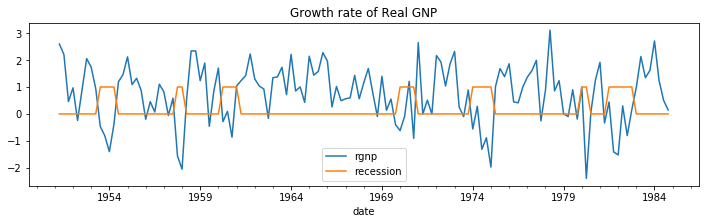

In [4]:
data.plot(title='Growth rate of Real GNP', figsize=(12,3));

In [5]:
mod_hamilton = sm.tsa.MarkovAutoregression(y, k_regimes=2, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()

C:\Conda\envs\env-masters\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [6]:
res_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     rgnp   No. Observations:                  131
Model:             MarkovAutoregression   Log Likelihood                -181.263
Date:                  Tue, 22 Jan 2019   AIC                            380.527
Time:                          22:59:47   BIC                            406.404
Sample:                      04-01-1951   HQIC                           391.042
                           - 10-01-1984                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3588      0.265     -1.356      0.175      -0.877       0.160
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1635      0.075     15.614      0.000       1.017       1.310
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5914      0.103      5.761      0.000       0.390       0.793
ar.L1          0.0135      0.120      0.112      0.911      -0.222       0.249
ar.L2         -0.0575      0.138     -0.418      0.676      -0.327       0.212
ar.L3         -0.2470      0.107     -2.310      0.021      -0.457      -0.037
ar.L4         -0.2129      0.111     -1.926      0.054      -0.430       0.004
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7547      0.097      7.819      0.000       0.565       0.944
p[1->0]        0.0959      0.038      2.542      0.011       0.022       0.170
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

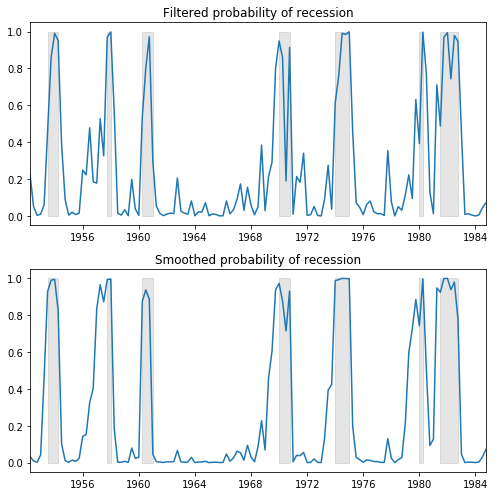

In [7]:
fig, axes = plt.subplots(2, figsize=(7,7))
ax = axes[0]
ax.plot(res_hamilton.filtered_marginal_probabilities[0])
ax.fill_between(rec.index, 0, 1, where=rec.values, color='k', alpha=0.1)
ax.set_xlim(y.index[4], y.index[-1])
ax.set(title='Filtered probability of recession')

ax = axes[1]
ax.plot(res_hamilton.smoothed_marginal_probabilities[0])
ax.fill_between(rec.index, 0, 1, where=rec.values, color='k', alpha=0.1)
ax.set_xlim(y.index[4], y.index[-1])
ax.set(title='Smoothed probability of recession')

fig.tight_layout()

In [8]:
print(res_hamilton.expected_durations)

[ 4.07604746 10.42589382]


## Own experiments with subclassing Statsmodels classes

In [9]:
from statsmodels.tsa.base.tsa_model import TimeSeriesModel, TimeSeriesModelResults, TimeSeriesResultsWrapper

In [10]:
class RSModel(TimeSeriesModel):
    """Test of a time series model."""
    
    

In [11]:
r = RSModel(y)

C:\Conda\envs\env-masters\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [12]:
r